#Mechatronics MP4 - Shirin Jamshidi - Mahya Shahshahani

## Getting data set from roboflow

In [ ]:
!pip install roboflow

In [ ]:
pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiofiles                         24.1.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="qmXdlsKqVuURfIBX1JvQ")
project = rf.workspace("proj-sfl83").project("grasp-6")
version = project.version(7)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.120, to fix: `pip install ultralytics==8.0.196`


## Using Yolo8 to train our model

In [ ]:
pip install ultralytics==8.0.196

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 9.9 MB/s eta 0:00:00


In [ ]:
import ultralytics
ultralytics.checks()
from ultralytics import YOLO

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.2/107.7 GB disk)


In [ ]:


# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from YAML
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)
model = YOLO("yolov8n.yaml").load("yolov8n.pt")  # build from YAML and transfer weights

# Train the model
results = model.train(data='/content/grasp-6-7/data.yaml' , epochs=50, imgsz=640, plots=True)




                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [ ]:
metrics = model.val()
print(metrics.box.map)

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
val: Scanning /content/grasp-6-7/valid/labels.cache... 212 images, 0 backgrounds, 0 corrupt: 100%|██████████| 212/212 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 579, len(boxes) = 620. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.44it/s]
                   all        212        620      0.887      0.877      0.928      0.819
                banana        212         72          1      0.966      0.984      0.919
               biscuit        212          8      

0.8187330295142407


In [ ]:
model.export(format="onnx")


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3009353 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 23, 8400) (6.0 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 74.7 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 8.3s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: export success ✅ 9.2s, saved as 'runs/detect/train/weights/best.onnx' (11.7 MB)

Export complete (11.0s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/de

'runs/detect/train/weights/best.onnx'

## Testing the model on some test images, files are saved and available in the report

In [ ]:
model.predict("/content/grasp-6-7/test/images/11_JPG.rf.8ad8b16fa119998a680a70f0502a46fe.jpg", save=True)



image 1/1 /content/grasp-6-7/test/images/11_JPG.rf.8ad8b16fa119998a680a70f0502a46fe.jpg: 640x640 3 forks, 1 logo, 1 spoon, 11.3ms
Speed: 4.1ms preprocess, 11.3ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'banana', 1: 'biscuit', 2: 'cake', 3: 'cup-laying-', 4: 'cup-standing-', 5: 'fork', 6: 'juice-laying-', 7: 'juice-standing-', 8: 'knife', 9: 'logo', 10: 'nescafe', 11: 'nescafe-square-', 12: 'pack', 13: 'rani-laying-', 14: 'rani-standing-', 15: 'spoon', 16: 'straw', 17: 'tangerine', 18: 'tea'}
 orig_img: array([[[ 14,   9,  10],
         [  2,   6,   0],
         [  0,  16,   0],
         ...,
         [ 59, 123,  51],
         [ 64, 128,  56],
         [ 72, 136,  64]],
 
        [[ 13,   8,   9],
         [  2,   6,   0],
         [  0,  15,   0],
         ...,
         [ 55, 119,  47],
         [ 60, 124,  52],
         [ 67, 131,  59]],
 
        [[  8,   6,   5],
         [  0,   7,   0],
         [  0,  14,   0],
         ...,
         [ 64, 128,  56],
         [ 70, 134,  62],
         [ 76, 140,  68]],
 
        ...,
 
        [

In [ ]:
model.predict("/content/grasp-6-7/test/images/11_jpg.rf.d2a987a1dbb7acd919516348e5c978e8.jpg", save = True)


image 1/1 /content/grasp-6-7/test/images/11_jpg.rf.d2a987a1dbb7acd919516348e5c978e8.jpg: 640x640 2 logos, 1 nescafe-square-, 21.2ms
Speed: 9.0ms preprocess, 21.2ms inference, 10.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'banana', 1: 'biscuit', 2: 'cake', 3: 'cup-laying-', 4: 'cup-standing-', 5: 'fork', 6: 'juice-laying-', 7: 'juice-standing-', 8: 'knife', 9: 'logo', 10: 'nescafe', 11: 'nescafe-square-', 12: 'pack', 13: 'rani-laying-', 14: 'rani-standing-', 15: 'spoon', 16: 'straw', 17: 'tangerine', 18: 'tea'}
 orig_img: array([[[ 16,  20,  15],
         [ 16,  20,  15],
         [ 16,  20,  15],
         ...,
         [  0,   5,   0],
         [  0,   5,   0],
         [  0,   5,   0]],
 
        [[ 22,  18,  13],
         [ 22,  18,  13],
         [ 21,  17,  12],
         ...,
         [  0,   6,   1],
         [  0,   6,   1],
         [  0,   6,   1]],
 
        [[ 49,  30,  23],
         [ 48,  29,  22],
         [ 47,  28,  21],
         ...,
         [  0,   6,   1],
         [  0,   6,   1],
         [  0,   6,   1]],
 
        ...,
 
        [

In [ ]:
result = model.predict("/content/grasp-6-7/test/images/13_jpg.rf.6fc4c56636dc0f7a1b3432450c006d5d.jpg", save=True)



image 1/1 /content/grasp-6-7/test/images/13_jpg.rf.6fc4c56636dc0f7a1b3432450c006d5d.jpg: 640x640 1 logo, 3 spoons, 12.6ms
Speed: 4.9ms preprocess, 12.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'banana', 1: 'biscuit', 2: 'cake', 3: 'cup-laying-', 4: 'cup-standing-', 5: 'fork', 6: 'juice-laying-', 7: 'juice-standing-', 8: 'knife', 9: 'logo', 10: 'nescafe', 11: 'nescafe-square-', 12: 'pack', 13: 'rani-laying-', 14: 'rani-standing-', 15: 'spoon', 16: 'straw', 17: 'tangerine', 18: 'tea'}
 orig_img: array([[[ 32, 128,  58],
         [ 32, 128,  58],
         [ 32, 128,  58],
         ...,
         [ 37, 116,  49],
         [ 37, 116,  49],
         [ 37, 116,  49]],
 
        [[ 33, 129,  59],
         [ 33, 129,  59],
         [ 33, 129,  59],
         ...,
         [ 37, 116,  49],
         [ 37, 116,  49],
         [ 37, 116,  49]],
 
        [[ 34, 130,  60],
         [ 34, 130,  60],
         [ 34, 130,  60],
         ...,
         [ 37, 116,  49],
         [ 37, 116,  49],
         [ 37, 116,  49]],
 
        ...,
 
        [

In [ ]:
model.predict("/content/grasp-6-7/test/images/IMG_E1367_JPG.rf.f343ecadbd878d7980f967b4e0af4cf3.jpg"   , save = True) ##good


image 1/1 /content/grasp-6-7/test/images/IMG_E1367_JPG.rf.f343ecadbd878d7980f967b4e0af4cf3.jpg: 640x640 1 knife, 27.4ms
Speed: 2.9ms preprocess, 27.4ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'banana', 1: 'biscuit', 2: 'cake', 3: 'cup-laying-', 4: 'cup-standing-', 5: 'fork', 6: 'juice-laying-', 7: 'juice-standing-', 8: 'knife', 9: 'logo', 10: 'nescafe', 11: 'nescafe-square-', 12: 'pack', 13: 'rani-laying-', 14: 'rani-standing-', 15: 'spoon', 16: 'straw', 17: 'tangerine', 18: 'tea'}
 orig_img: array([[[147, 160, 174],
         [146, 159, 173],
         [146, 159, 173],
         ...,
         [109, 179,  88],
         [109, 179,  88],
         [110, 180,  89]],
 
        [[143, 156, 170],
         [143, 156, 170],
         [143, 156, 170],
         ...,
         [110, 180,  89],
         [110, 180,  89],
         [110, 180,  89]],
 
        [[142, 155, 169],
         [142, 155, 169],
         [142, 155, 169],
         ...,
         [111, 181,  90],
         [111, 181,  90],
         [112, 182,  91]],
 
        ...,
 
        [

In [ ]:
model.predict("/content/grasp-6-7/test/images/IMG_3073_JPG.rf.9890783f1f919ab1052eaad331eea471.jpg", save = True) ##good


image 1/1 /content/grasp-6-7/test/images/IMG_3073_JPG.rf.9890783f1f919ab1052eaad331eea471.jpg: 640x640 1 juice-laying-, 1 logo, 1 rani-laying-, 12.0ms
Speed: 2.9ms preprocess, 12.0ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'banana', 1: 'biscuit', 2: 'cake', 3: 'cup-laying-', 4: 'cup-standing-', 5: 'fork', 6: 'juice-laying-', 7: 'juice-standing-', 8: 'knife', 9: 'logo', 10: 'nescafe', 11: 'nescafe-square-', 12: 'pack', 13: 'rani-laying-', 14: 'rani-standing-', 15: 'spoon', 16: 'straw', 17: 'tangerine', 18: 'tea'}
 orig_img: array([[[ 47, 114,  63],
         [ 48, 115,  64],
         [ 50, 117,  66],
         ...,
         [ 47, 122,  70],
         [ 60, 135,  83],
         [ 88, 163, 111]],
 
        [[ 63, 130,  79],
         [ 58, 125,  74],
         [ 51, 118,  67],
         ...,
         [ 68, 143,  91],
         [ 49, 124,  72],
         [ 37, 112,  60]],
 
        [[ 58, 125,  74],
         [ 51, 118,  67],
         [ 43, 110,  59],
         ...,
         [ 74, 149,  97],
         [ 54, 129,  77],
         [ 59, 134,  82]],
 
        ...,
 
        [

In [ ]:
model.predict("/content/grasp-6-7/test/images/IMG_3062_JPG.rf.c903d568fe21a38c1fd6b6cbc6269360.jpg", save = True)


image 1/1 /content/grasp-6-7/test/images/IMG_3062_JPG.rf.c903d568fe21a38c1fd6b6cbc6269360.jpg: 640x640 1 juice-standing-, 1 logo, 12.0ms
Speed: 2.9ms preprocess, 12.0ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'banana', 1: 'biscuit', 2: 'cake', 3: 'cup-laying-', 4: 'cup-standing-', 5: 'fork', 6: 'juice-laying-', 7: 'juice-standing-', 8: 'knife', 9: 'logo', 10: 'nescafe', 11: 'nescafe-square-', 12: 'pack', 13: 'rani-laying-', 14: 'rani-standing-', 15: 'spoon', 16: 'straw', 17: 'tangerine', 18: 'tea'}
 orig_img: array([[[ 99, 176, 114],
         [ 88, 165, 103],
         [ 80, 157,  95],
         ...,
         [ 72, 137,  75],
         [ 72, 137,  75],
         [ 63, 128,  66]],
 
        [[ 72, 149,  87],
         [ 95, 172, 110],
         [105, 182, 120],
         ...,
         [ 70, 135,  73],
         [ 71, 136,  74],
         [ 65, 130,  68]],
 
        [[ 81, 158,  96],
         [ 75, 152,  90],
         [ 85, 162, 100],
         ...,
         [ 68, 133,  71],
         [ 68, 133,  71],
         [ 68, 133,  71]],
 
        ...,
 
        [

In [ ]:
model.predict("/content/grasp-6-7/test/images/IMG_E1386_JPG.rf.d7289bcd6306733570f8e0bbf16ef1f3.jpg", save = True)


image 1/1 /content/grasp-6-7/test/images/IMG_E1386_JPG.rf.d7289bcd6306733570f8e0bbf16ef1f3.jpg: 640x640 1 cake, 11.9ms
Speed: 2.8ms preprocess, 11.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict6


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'banana', 1: 'biscuit', 2: 'cake', 3: 'cup-laying-', 4: 'cup-standing-', 5: 'fork', 6: 'juice-laying-', 7: 'juice-standing-', 8: 'knife', 9: 'logo', 10: 'nescafe', 11: 'nescafe-square-', 12: 'pack', 13: 'rani-laying-', 14: 'rani-standing-', 15: 'spoon', 16: 'straw', 17: 'tangerine', 18: 'tea'}
 orig_img: array([[[153, 162, 176],
         [158, 167, 181],
         [158, 167, 181],
         ...,
         [119, 193,  99],
         [119, 193,  99],
         [119, 193,  99]],
 
        [[152, 161, 175],
         [157, 166, 180],
         [157, 166, 180],
         ...,
         [119, 193,  99],
         [119, 193,  99],
         [119, 193,  99]],
 
        [[151, 160, 174],
         [154, 163, 177],
         [154, 163, 177],
         ...,
         [119, 193,  99],
         [119, 193,  99],
         [119, 193,  99]],
 
        ...,
 
        [

## Saving bounding box details of some images for the segmentation part

In [ ]:
images = [ "/content/grasp-6-7/test/images/IMG_3062_JPG.rf.c903d568fe21a38c1fd6b6cbc6269360.jpg",
          "/content/grasp-6-7/test/images/IMG_3073_JPG.rf.9890783f1f919ab1052eaad331eea471.jpg",
           "/content/grasp-6-7/test/images/IMG_E1367_JPG.rf.f343ecadbd878d7980f967b4e0af4cf3.jpg",
           "/content/grasp-6-7/test/images/IMG_E1386_JPG.rf.d7289bcd6306733570f8e0bbf16ef1f3.jpg"

]


In [ ]:
results = model.predict(images)


0: 640x640 1 juice-standing-, 1 logo, 1: 640x640 1 juice-laying-, 1 logo, 1 rani-laying-, 2: 640x640 1 knife, 3: 640x640 1 cake, 91.4ms
Speed: 2.6ms preprocess, 22.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
import torch
box_list = [result.boxes.xyxy for result in results]
print(box_list)

[tensor([[182.1726, 286.9379, 366.5154, 413.7598],
        [165.6568, 141.1905, 357.4330, 272.2341]], device='cuda:0'), tensor([[242.1310, 147.5558, 566.0275, 302.9725],
        [ 52.4214, 272.0123, 211.7733, 480.6141],
        [270.8561, 297.1884, 443.0964, 416.1217]], device='cuda:0'), tensor([[292.0341, 308.5397, 474.3297, 357.8447]], device='cuda:0'), tensor([[265.4601, 282.9014, 417.3744, 418.1130]], device='cuda:0')]


In [ ]:
torch.save(box_list, 'box_list.pt')

In [ ]:
!git clone https://github.com/username/fastsam.git
!pip install ./fastsam

Cloning into 'fastsam'...
fatal: could not read Username for 'https://github.com': No such device or address
ERROR: Invalid requirement: './fastsam'
Hint: It looks like a path. File './fastsam' does not exist.


## Importing FastSam, then segmenting images

In [1]:
!git clone https://github.com/CASIA-IVA-Lab/FastSAM.git
!pip -q install -r FastSAM/requirements.txt
!pip -q install git+https://github.com/openai/CLIP.git roboflow supervision

!pip -q install git+https://github.com/facebookresearch/segment-anything.git
!wget -P FastSAM/weights https://huggingface.co/spaces/An-619/FastSAM/resolve/main/weights/FastSAM.pt
!wget -P FastSAM/weights https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

Cloning into 'FastSAM'...
remote: Enumerating objects: 1329, done.
remote: Counting objects: 100% (494/494), done.
remote: Compressing objects: 100% (155/155), done.
remote: Total 1329 (delta 377), reused 399 (delta 338), pack-reused 835
Receiving objects: 100% (1329/1329), 72.57 MiB | 22.91 MiB/s, done.
Resolving deltas: 100% (530/530), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [2]:
HOME = '/content'

In [3]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://huggingface.co/spaces/An-619/FastSAM/resolve/main/weights/FastSAM.pt
!wget -P {HOME}/weights -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
!ls -lh {HOME}/weights

total 2.6G
-rw-r--r-- 1 root root 139M Jun 20  2023 FastSAM.pt
-rw-r--r-- 1 root root 2.4G Apr  4  2023 sam_vit_h_4b8939.pth


In [4]:
FAST_SAM_CHECKPOINT_PATH = f"{HOME}/weights/FastSAM.pt"
SAM_SAM_CHECKPOINT_PATH = f"{HOME}/weights/sam_vit_h_4b8939.pth"

In [5]:
%cd {HOME}/FastSAM

import os
import cv2
import torch
import roboflow
import base64

import supervision as sv
import numpy as np

from roboflow import Roboflow
from fastsam import FastSAM, FastSAMPrompt
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

/content/FastSAM


In [6]:
fast_sam = FastSAM(FAST_SAM_CHECKPOINT_PATH)

In [7]:
from roboflow import Roboflow
rf = Roboflow(api_key="qJ1dCx1Mt9ObCFSuMNTB")
project = rf.workspace("proj-sfl83").project("grasp-6")
version = project.version(7)
dataset = version.download("createml")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to grasp-6-7 in createml:: 100%|██████████| 3094/3094 [00:00<00:00, 4276.69it/s]


In [15]:
images = [
    "/content/FastSAM/grasp-6-7/test/IMG_3062_JPG.rf.c903d568fe21a38c1fd6b6cbc6269360.jpg",
    "/content/FastSAM/grasp-6-7/test/IMG_3073_JPG.rf.9890783f1f919ab1052eaad331eea471.jpg",
    "/content/FastSAM/grasp-6-7/test/IMG_E1367_JPG.rf.f343ecadbd878d7980f967b4e0af4cf3.jpg",
    "/content/FastSAM/grasp-6-7/test/IMG_E1386_JPG.rf.d7289bcd6306733570f8e0bbf16ef1f3.jpg"
]

In [9]:
box_list = [
    [[182.1726, 286.9379, 366.5154, 413.7598],
                  [165.6568, 141.1905, 357.4330, 272.2341]],
    [[242.1310, 147.5558, 566.0275, 302.9725],
                  [52.4214, 272.0123, 211.7733, 480.6141],
                  [270.8561, 297.1884, 443.0964, 416.1217]],
    [[292.0341, 308.5397, 474.3297, 357.8447]],
    [[265.4601, 282.9014, 417.3744, 418.1130]]
]

In [10]:
# Convert masks to boolean (True/False)
def masks_to_bool(masks):
    if type(masks) == np.ndarray:
        return masks.astype(bool)
    return masks.cpu().numpy().astype(bool)

def annotate_image(image_path: str, masks: np.ndarray) -> np.ndarray:
    image = cv2.imread(image_path)

    xyxy = sv.mask_to_xyxy(masks=masks)
    detections = sv.Detections(xyxy=xyxy, mask=masks)

    mask_annotator = sv.MaskAnnotator(color_lookup = sv.ColorLookup.INDEX)
    return mask_annotator.annotate(scene=image.copy(), detections=detections)

In [11]:
# helper function that loads an image before adding it to the widget

def encode_image(filepath):
    with open(filepath, 'rb') as f:
        image_bytes = f.read()
    encoded = str(base64.b64encode(image_bytes), 'utf-8')
    return "data:image/jpg;base64,"+encoded

[[182, 287, 367, 414], [166, 141, 357, 272]]


image 1/1 /content/FastSAM/grasp-6-7/test/IMG_3062_JPG.rf.c903d568fe21a38c1fd6b6cbc6269360.jpg: 1024x1024 7 objects, 166.0ms
Speed: 5.7ms preprocess, 166.0ms inference, 3.7ms postprocess per image at shape (1, 3, 1024, 1024)


[182, 287, 367, 414]
[166, 141, 357, 272]


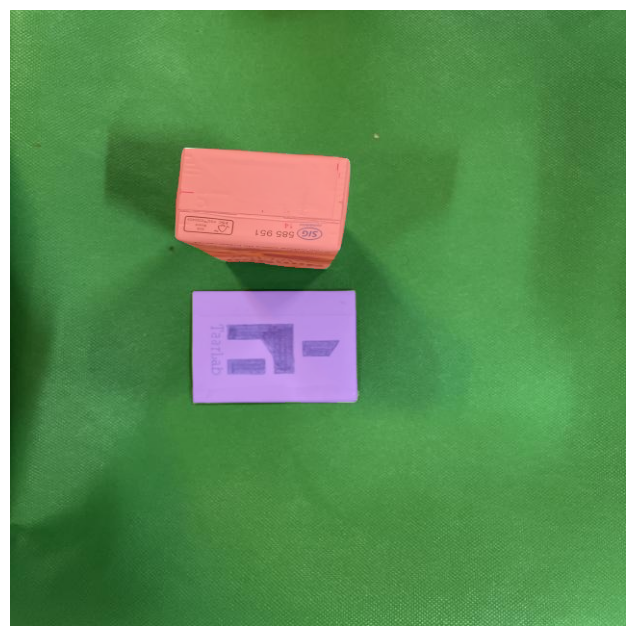

[[242, 148, 566, 303], [52, 272, 212, 481], [271, 297, 443, 416]]


image 1/1 /content/FastSAM/grasp-6-7/test/IMG_3073_JPG.rf.9890783f1f919ab1052eaad331eea471.jpg: 1024x1024 14 objects, 169.9ms
Speed: 5.3ms preprocess, 169.9ms inference, 3.7ms postprocess per image at shape (1, 3, 1024, 1024)


[242, 148, 566, 303]
[52, 272, 212, 481]
[271, 297, 443, 416]


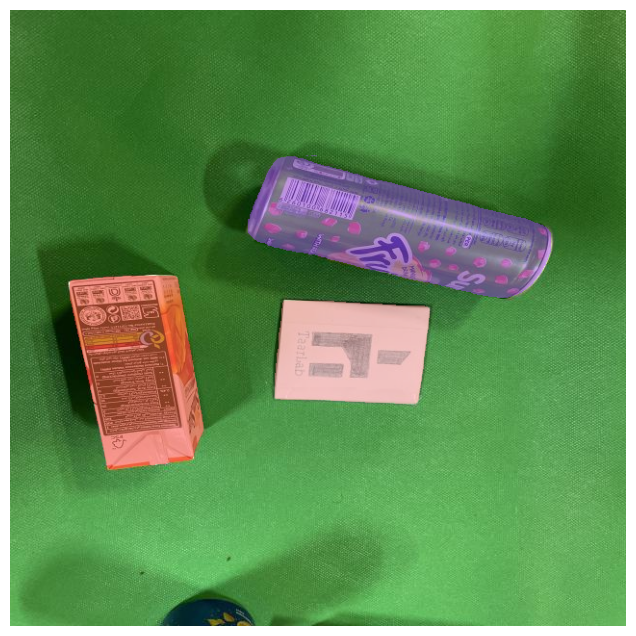

[[292.0341, 308.5397, 474.3297, 357.8447]]


image 1/1 /content/FastSAM/grasp-6-7/test/IMG_E1367_JPG.rf.f343ecadbd878d7980f967b4e0af4cf3.jpg: 1024x1024 8 objects, 167.3ms
Speed: 5.4ms preprocess, 167.3ms inference, 6.2ms postprocess per image at shape (1, 3, 1024, 1024)


[292.0341, 308.5397, 474.3297, 357.8447]


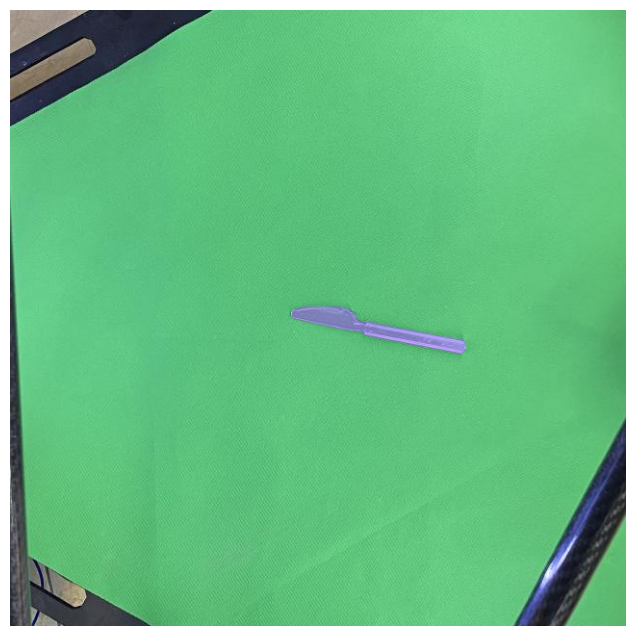

[[265.4601, 282.9014, 417.3744, 418.113]]


image 1/1 /content/FastSAM/grasp-6-7/test/IMG_E1386_JPG.rf.d7289bcd6306733570f8e0bbf16ef1f3.jpg: 1024x1024 7 objects, 169.0ms
Speed: 5.4ms preprocess, 169.0ms inference, 3.3ms postprocess per image at shape (1, 3, 1024, 1024)


[265.4601, 282.9014, 417.3744, 418.113]


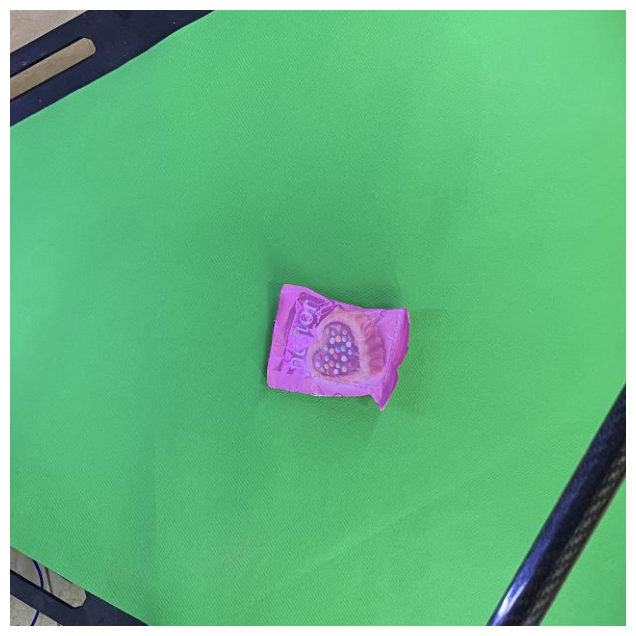

In [16]:
import numpy as np
DEVICE = 'cuda:0'
for i in range(len(images)):

  IMAGE_PATH = images[i]
  boxes = box_list[i]
  print(boxes)
  results = fast_sam(
      source=IMAGE_PATH,
      device=DEVICE,
      retina_masks=True,
      imgsz=1024,
      conf=0.5,
      iou=0.6)
  prompt_process = FastSAMPrompt(IMAGE_PATH, results, device=DEVICE)
  masks = []
  for box in boxes:
    print(box)
    mask = prompt_process.box_prompt(bbox=box)
    masks.append(mask)

  masks = np.concatenate(masks, axis=0)
  masks = masks_to_bool(masks)
  annotated_image=annotate_image(image_path=IMAGE_PATH, masks=masks)
  sv.plot_image(image=annotated_image, size=(8, 8))


## Grasp point generation

In [103]:
images = [
    "/content/FastSAM/grasp-6-7/test/IMG_3062_JPG.rf.c903d568fe21a38c1fd6b6cbc6269360.jpg",
    "/content/FastSAM/grasp-6-7/test/IMG_3073_JPG.rf.9890783f1f919ab1052eaad331eea471.jpg"
]

Processing image: /content/FastSAM/grasp-6-7/test/IMG_3062_JPG.rf.c903d568fe21a38c1fd6b6cbc6269360.jpg
Bounding boxes: [[182, 287, 367, 414], [166, 141, 357, 272]]


image 1/1 /content/FastSAM/grasp-6-7/test/IMG_3062_JPG.rf.c903d568fe21a38c1fd6b6cbc6269360.jpg: 1024x1024 7 objects, 164.8ms
Speed: 5.3ms preprocess, 164.8ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


Processing box: [182, 287, 367, 414]
Processing box: [166, 141, 357, 272]


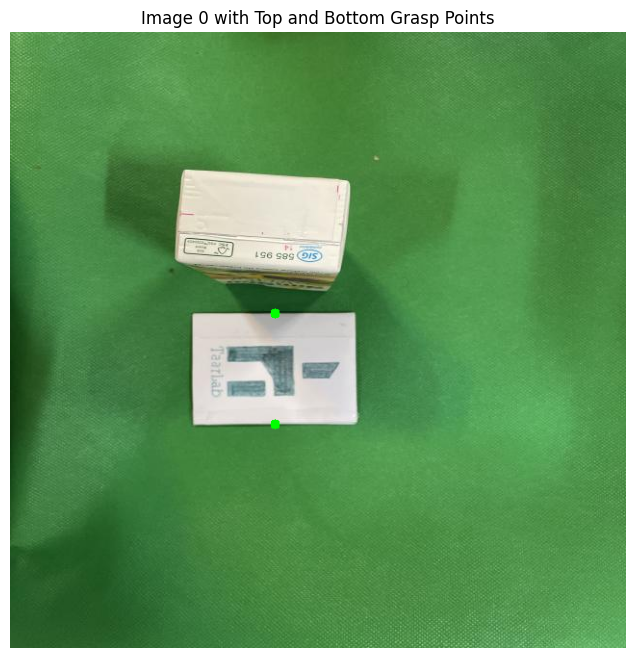

Processing image: /content/FastSAM/grasp-6-7/test/IMG_3073_JPG.rf.9890783f1f919ab1052eaad331eea471.jpg
Bounding boxes: [[242, 148, 566, 303], [52, 272, 212, 481], [271, 297, 443, 416]]


image 1/1 /content/FastSAM/grasp-6-7/test/IMG_3073_JPG.rf.9890783f1f919ab1052eaad331eea471.jpg: 1024x1024 14 objects, 164.7ms
Speed: 5.4ms preprocess, 164.7ms inference, 3.7ms postprocess per image at shape (1, 3, 1024, 1024)


Processing box: [242, 148, 566, 303]
Processing box: [52, 272, 212, 481]
Processing box: [271, 297, 443, 416]


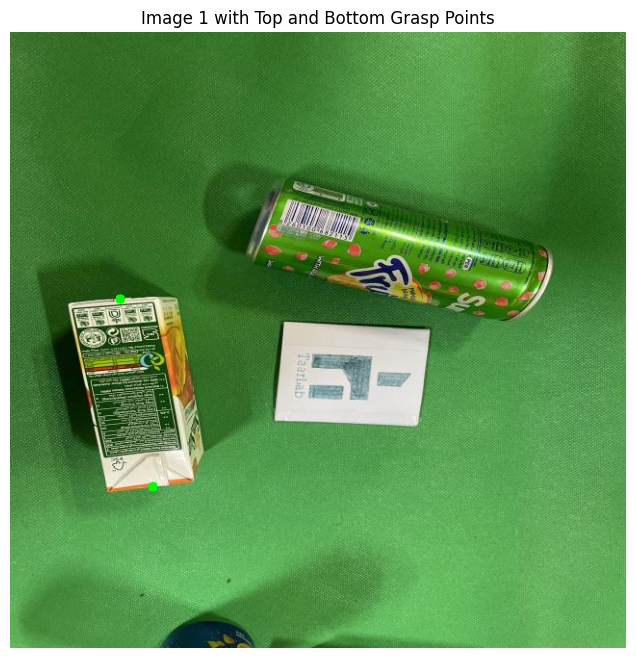

In [104]:
import cv2
import numpy as np
import shapely.geometry as sg
import matplotlib.pyplot as plt

def get_rotated_rectangles(masks):
    rotated_rectangles = []
    angles = []
    for mask in masks:
        contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if len(contours) > 0:
            cnt = contours[0]
            rect = cv2.minAreaRect(cnt)
            box = cv2.boxPoints(rect)
            box = np.intp(box)
            rotated_rectangles.append(box)
            angles.append(rect[2])
        else:
            rotated_rectangles.append(None)
            angles.append(None)
    return rotated_rectangles, angles

def find_center(rect):
    if rect is None:
        return None
    else:
        (x, y), (w, h), angle = cv2.minAreaRect(rect)
        return (int(x), int(y))

def find_grasp_points(mask, center, angle):
    contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0 or center is None:
        return None

    cnt = contours[0]
    polygon = sg.Polygon(cnt[:, 0, :])

    # Create lines passing through the center with the given angle in both directions
    length = max(mask.shape)
    angle_rad = np.deg2rad(angle)
    end_point1 = (center[0] - length * np.cos(angle_rad), center[1] - length * np.sin(angle_rad))
    end_point2 = (center[0] + length * np.cos(angle_rad), center[1] + length * np.sin(angle_rad))
    line1 = sg.LineString([center, end_point1])
    line2 = sg.LineString([center, end_point2])

    # Find intersection points for both lines
    intersection_points1 = polygon.intersection(line1)
    intersection_points2 = polygon.intersection(line2)

    # Filter intersection points to keep only those on the boundary for both lines
    boundary_points1 = []
    if not intersection_points1.is_empty and intersection_points1:
        if intersection_points1.geom_type == 'Point':
            boundary_points1.append(np.array([intersection_points1.x, intersection_points1.y]))
        elif intersection_points1.geom_type == 'MultiPoint':
            for point in intersection_points1:
                boundary_points1.append(np.array([point.x, point.y]))
        elif intersection_points1.geom_type == 'LineString':
            line_points1 = np.array(intersection_points1.xy).T
            for point in line_points1:
                boundary_points1.append(np.array([point[0], point[1]]))

    boundary_points2 = []
    if not intersection_points2.is_empty and intersection_points2:
        if intersection_points2.geom_type == 'Point':
            boundary_points2.append(np.array([intersection_points2.x, intersection_points2.y]))
        elif intersection_points2.geom_type == 'MultiPoint':
            for point in intersection_points2:
                boundary_points2.append(np.array([point.x, point.y]))
        elif intersection_points2.geom_type == 'LineString':
            line_points2 = np.array(intersection_points2.xy).T
            for point in line_points2:
                boundary_points2.append(np.array([point[0], point[1]]))

    # Ensure we have enough boundary points for both lines
    if len(boundary_points1) < 2 or len(boundary_points2) < 2:
        return None

    # Find points farthest from the center to get two grasp points on the boundaries
    distances1 = np.linalg.norm(np.array(boundary_points1) - center, axis=1)
    distances2 = np.linalg.norm(np.array(boundary_points2) - center, axis=1)

    grasp_point_indices1 = np.argsort(distances1)[-1]
    grasp_point_indices2 = np.argsort(distances2)[-1]

    grasp_points1 = [boundary_points1[grasp_point_indices1]]
    grasp_points2 = [boundary_points2[grasp_point_indices2]]

    return grasp_points1, grasp_points2

def visualize_grasp_points(image, grasp_points):
    for points in grasp_points:
        for point in points:
            cv2.circle(image, (int(point[0]), int(point[1])), 5, (0, 255, 0), -1)
    return image


DEVICE = 'cuda:0'
for i in range(len(images)):
    IMAGE_PATH = images[i]
    boxes = box_list[i]
    print("Processing image:", IMAGE_PATH)
    print("Bounding boxes:", boxes)

    results = fast_sam(
        source=IMAGE_PATH,
        device=DEVICE,
        retina_masks=True,
        imgsz=1024,
        conf=0.5,
        iou=0.6
    )

    prompt_process = FastSAMPrompt(IMAGE_PATH, results, device=DEVICE)
    masks = []
    for box in boxes:
        print("Processing box:", box)
        mask = prompt_process.box_prompt(bbox=box)
        masks.append(mask)

    masks = np.concatenate(masks, axis=0)
    masks = masks_to_bool(masks)

    rotated_rectangles, angles = get_rotated_rectangles(masks)
    centers = [find_center(rect) for rect in rotated_rectangles]
    grasp_points1 = []
    grasp_points2 = []
    for mask, center, angle in zip(masks, centers, angles):
        gp1, gp2 = find_grasp_points(mask, center, angle)
        grasp_points1.append(gp1)
        grasp_points2.append(gp2)

    # Visualize
    image = cv2.imread(IMAGE_PATH)
    if grasp_points1[i] is not None and grasp_points2[i] is not None:
        image_with_grasp_points = visualize_grasp_points(image, [grasp_points1[i], grasp_points2[i]])
        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(image_with_grasp_points, cv2.COLOR_BGR2RGB))
        plt.title(f'Image {i} with Top and Bottom Grasp Points')
        plt.axis('off')
        plt.show()
    else:
        print(f"No grasp points found for image {IMAGE_PATH}")


In [105]:
images = [
    "/content/FastSAM/grasp-6-7/test/IMG_E1386_JPG.rf.d7289bcd6306733570f8e0bbf16ef1f3.jpg",
    "/content/FastSAM/grasp-6-7/test/IMG_E1367_JPG.rf.f343ecadbd878d7980f967b4e0af4cf3.jpg",
]

Processing image: /content/FastSAM/grasp-6-7/test/IMG_E1386_JPG.rf.d7289bcd6306733570f8e0bbf16ef1f3.jpg
Bounding boxes: [[182, 287, 367, 414], [166, 141, 357, 272]]


image 1/1 /content/FastSAM/grasp-6-7/test/IMG_E1386_JPG.rf.d7289bcd6306733570f8e0bbf16ef1f3.jpg: 1024x1024 7 objects, 164.1ms
Speed: 7.6ms preprocess, 164.1ms inference, 3.4ms postprocess per image at shape (1, 3, 1024, 1024)


Processing box: [182, 287, 367, 414]
Processing box: [166, 141, 357, 272]


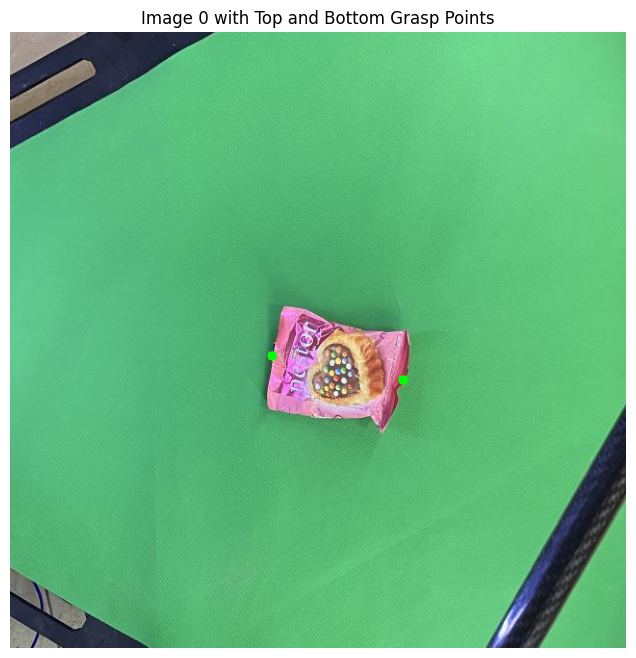

Processing image: /content/FastSAM/grasp-6-7/test/IMG_E1367_JPG.rf.f343ecadbd878d7980f967b4e0af4cf3.jpg
Bounding boxes: [[242, 148, 566, 303], [52, 272, 212, 481], [271, 297, 443, 416]]


image 1/1 /content/FastSAM/grasp-6-7/test/IMG_E1367_JPG.rf.f343ecadbd878d7980f967b4e0af4cf3.jpg: 1024x1024 8 objects, 165.0ms
Speed: 5.6ms preprocess, 165.0ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


Processing box: [242, 148, 566, 303]
Processing box: [52, 272, 212, 481]
Processing box: [271, 297, 443, 416]


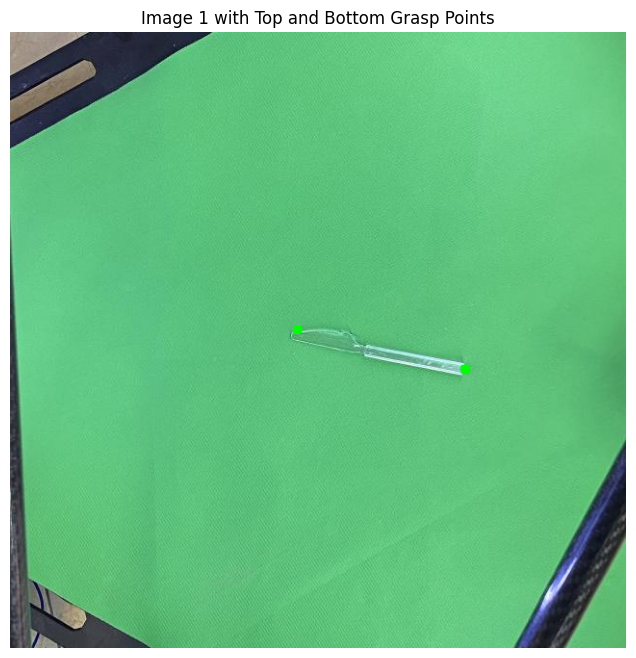

In [106]:

DEVICE = 'cuda:0'
for i in range(len(images)):
    IMAGE_PATH = images[i]
    boxes = box_list[i]
    print("Processing image:", IMAGE_PATH)
    print("Bounding boxes:", boxes)

    results = fast_sam(
        source=IMAGE_PATH,
        device=DEVICE,
        retina_masks=True,
        imgsz=1024,
        conf=0.5,
        iou=0.6
    )

    prompt_process = FastSAMPrompt(IMAGE_PATH, results, device=DEVICE)
    masks = []
    for box in boxes:
        print("Processing box:", box)
        mask = prompt_process.box_prompt(bbox=box)
        masks.append(mask)

    masks = np.concatenate(masks, axis=0)
    masks = masks_to_bool(masks)

    rotated_rectangles, angles = get_rotated_rectangles(masks)
    centers = [find_center(rect) for rect in rotated_rectangles]
    grasp_points1 = []
    grasp_points2 = []
    for mask, center, angle in zip(masks, centers, angles):
        gp1, gp2 = find_grasp_points(mask, center, angle)
        grasp_points1.append(gp1)
        grasp_points2.append(gp2)

    # Visualize
    image = cv2.imread(IMAGE_PATH)
    if i < len(grasp_points1) and i < len(grasp_points2) and grasp_points1[i] is not None and grasp_points2[i] is not None:
        image_with_grasp_points = visualize_grasp_points(image, [grasp_points1[i], grasp_points2[i]])
        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(image_with_grasp_points, cv2.COLOR_BGR2RGB))
        plt.title(f'Image {i} with Top and Bottom Grasp Points')
        plt.axis('off')
        plt.show()
    else:
        print(f"No grasp points found for image {IMAGE_PATH}")
